## please put this file and your train.csv, test.csv in the same location in your computer
## please download these package before runing the code if you haven't downloaded yet:
    pandas, numpy, sklearn, imblearn, keras, matplotlib

## Data pre-processing & EDA

In [8]:
import pandas as pd
import numpy as np

In [9]:
#data types observation 
data = pd.read_csv("train.csv", engine = "python")
print(data.shape)
data.dtypes

(29514, 16)


ID                 int64
Age                int64
Workclass         object
fnlwgt             int64
Education         object
Education_Num      int64
Martial_Status    object
Occupation        object
Relationship      object
Race              object
Sex               object
Capital_Gain       int64
Capital_Loss       int64
Hours_per_week     int64
Country           object
Target             int64
dtype: object

In [3]:
#split data into train_data (variables for training) and train_targets (answers)
train_data = data
train_targets = pd.DataFrame()
train_targets = train_data['Target']
train_data = train_data.drop(columns = "Target")

In [4]:
#cate_lst: the list of object variables
#nume_lst: the list of numeric variables 
categorical_features_indices = np.where(train_data.dtypes == "object")[0]
numerical_features_indices = np.where(train_data.dtypes != "object")[0]
cate_lst = train_data.columns[categorical_features_indices]
nume_lst = train_data.columns[numerical_features_indices]

In [5]:
#change the obejct into numeric data
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
for i in range(0, len(cate_lst)):
    if (train_data[cate_lst[i]].count() != len(train_data)):
        train_data[cate_lst[i]] = train_data[cate_lst[i]].fillna("NA")
        #print(cate_lst[i])
        train_data[cate_lst[i]] = labelencoder.fit_transform(train_data[cate_lst[i]])
    else:
        #print(cate_lst[i])
        train_data[cate_lst[i]] = labelencoder.fit_transform(train_data[cate_lst[i]])
        
#standarize the numeric data
for lst in nume_lst:
    train_data[lst] = (train_data[lst] - train_data[lst].mean()) / train_data[lst].std()

In [6]:
#review descriptive statistic
train_data.describe()

,ID,Age,Workclass,fnlwgt,Education,Education_Num,Martial_Status,Occupation,Relationship,Race,Sex,Capital_Gain,Capital_Loss,Hours_per_week,Country
count,2.951400e+04,2.951400e+04,29514.000000,2.951400e+04,29514.000000,2.951400e+04,29514.000000,29514.000000,29514.000000,29514.000000,29514.000000,2.951400e+04,2.951400e+04,2.951400e+04,29514.000000
mean,-7.540293e-16,-3.795839e-16,3.409196,-6.409719e-17,10.206275,8.010503e-16,2.702209,6.438673,1.560310,3.654164,0.640645,6.820203e-16,-6.309113e-16,9.060690e-16,35.504405
std,1.000000e+00,1.000000e+00,1.609963,1.000000e+00,4.009232,1.000000e+00,1.570983,4.364673,1.580117,0.857381,0.479819,1.000000e+00,1.000000e+00,1.000000e+00,5.910318
min,-1.731468e+00,-1.490204e+00,0.000000,-1.670746e+00,0.000000,-3.524225e+00,0.000000,0.000000,0.000000,0.000000,0.000000,-1.121876e-01,-1.985223e-01,-3.101111e+00,0.000000
25%,-8.656193e-01,-8.458037e-01,3.000000,-6.823380e-01,9.000000,-3.304405e-01,2.000000,3.000000,0.000000,4.000000,0.000000,-1.121876e-01,-1.985223e-01,-1.324563e-01,37.000000
50%,-4.607493e-03,-1.298038e-01,3.000000,-1.062217e-01,11.000000,6.878259e-02,2.000000,6.000000,1.000000,4.000000,1.000000,-1.121876e-01,-1.985223e-01,2.801146e-02,37.000000
75%,8.625746e-01,6.577961e-01,3.000000,4.548069e-01,12.000000,4.680056e-01,4.000000,11.000000,3.000000,4.000000,1.000000,-1.121876e-01,-1.985223e-01,2.687132e-01,37.000000
max,1.742311e+00,3.736596e+00,8.000000,1.223283e+01,15.000000,2.464121e+00,6.000000,14.000000,5.000000,4.000000,1.000000,1.810962e+01,1.164792e+01,4.761812e+00,40.000000


In [7]:
#deal with the imbalanced problem: 90% of the target is “0” (a person doesn’t make over 50K a year)
from imblearn.combine import SMOTETomek
smt = SMOTETomek(random_state=22) #set the random state to keep the result unchanged
train_data, train_targets = smt.fit_sample(train_data, train_targets)

C:\Users\smile\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.
C:\Users\smile\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\smile\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\smile\Anaconda3\lib\site-packages\tensorflow\python\framework\

In [8]:
#use “to_categorical” to transform train_targets to categorical data
from keras.utils.np_utils import to_categorical
train_targets = to_categorical(train_targets)
train_targets

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [0., 1.],
       [0., 1.],
       [0., 1.]], dtype=float32)

In [9]:
#delete some columns not suitable for training
train_data = train_data.drop(columns = ["ID", "Education", "Country"])

## Model

In [10]:
#build the model
from keras import models
from keras import layers

def build_model():
    model = models.Sequential()
    model.add(layers.Dense(64, activation='softmax', input_shape=(train_data.shape[1],)))
    model.add(layers.Dense(64, activation='softmax'))
    model.add(layers.Dense(2, activation='softmax')) 

    model.compile(optimizer='rmsprop', 
                  loss='mse', 
                  metrics=['accuracy'])
    return model

In [11]:
#create the validation set, help to detect overfitting...
x_val = train_data[:2000]
partial_x_train = train_data[2000:]
y_val = train_targets[:2000]
partial_y_train = train_targets[2000:]

In [12]:
#start to train
model = build_model()
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=200,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
Train on 49700 samples, validate on 2000 samples
Epoch 1/200
49700/49700 [==============================] - 0s 9us/step - loss: 0.2488 - accuracy: 0.5152 - val_loss: 0.2605 - val_accuracy: 0.1230
Epoch 2/200
49700/49700 [==============================] - 0s 6us/step - loss: 0.2439 - accuracy: 0.6095 - val_loss: 0.2480 - val_accuracy: 0.6210
Epoch 3/200
49700/49700 [==============================] - 0s 6us/step - loss: 0.2340 - accuracy: 0.7433 - val_loss: 0.2330 - val_accuracy: 0.7245
Epoch 4/200
49700/49700 [==============================] - 0s 6us/step - loss: 0.2208 - accuracy: 0.7675 - val_loss: 0.2187 - val_accuracy: 0.7420
Epoch 5/200
49700/49700 [==============================] - 0s 7us/step - loss: 0.2063 - accuracy: 0.7750 - val_loss: 0.2086 - val_accuracy: 0.7405
Epoch 6/200
49700/49700 [==============================] - 0s 6us/step - loss: 0.1920 - accuracy

49700/49700 [==============================] - 0s 7us/step - loss: 0.1077 - accuracy: 0.8508 - val_loss: 0.1401 - val_accuracy: 0.7875
Epoch 108/200
49700/49700 [==============================] - 0s 6us/step - loss: 0.1077 - accuracy: 0.8513 - val_loss: 0.1297 - val_accuracy: 0.8040
Epoch 109/200
49700/49700 [==============================] - 0s 6us/step - loss: 0.1077 - accuracy: 0.8509 - val_loss: 0.1266 - val_accuracy: 0.8085
Epoch 110/200
49700/49700 [==============================] - 0s 6us/step - loss: 0.1076 - accuracy: 0.8506 - val_loss: 0.1157 - val_accuracy: 0.8285
Epoch 111/200
49700/49700 [==============================] - 0s 6us/step - loss: 0.1076 - accuracy: 0.8511 - val_loss: 0.1417 - val_accuracy: 0.7855
Epoch 112/200
49700/49700 [==============================] - 0s 6us/step - loss: 0.1075 - accuracy: 0.8511 - val_loss: 0.1489 - val_accuracy: 0.7765
Epoch 113/200
49700/49700 [==============================] - 0s 6us/step - loss: 0.1075 - accuracy: 0.8508 - val_loss: 0

49700/49700 [==============================] - 0s 7us/step - loss: 0.1062 - accuracy: 0.8524 - val_loss: 0.1398 - val_accuracy: 0.7860
Epoch 163/200
49700/49700 [==============================] - 0s 6us/step - loss: 0.1061 - accuracy: 0.8521 - val_loss: 0.1267 - val_accuracy: 0.8070
Epoch 164/200
49700/49700 [==============================] - 0s 6us/step - loss: 0.1061 - accuracy: 0.8524 - val_loss: 0.1333 - val_accuracy: 0.7970
Epoch 165/200
49700/49700 [==============================] - 0s 6us/step - loss: 0.1061 - accuracy: 0.8518 - val_loss: 0.1332 - val_accuracy: 0.7985
Epoch 166/200
49700/49700 [==============================] - 0s 6us/step - loss: 0.1060 - accuracy: 0.8523 - val_loss: 0.1368 - val_accuracy: 0.7925
Epoch 167/200
49700/49700 [==============================] - 0s 6us/step - loss: 0.1060 - accuracy: 0.8523 - val_loss: 0.1417 - val_accuracy: 0.7830
Epoch 168/200
49700/49700 [==============================] - 0s 6us/step - loss: 0.1060 - accuracy: 0.8523 - val_loss: 0

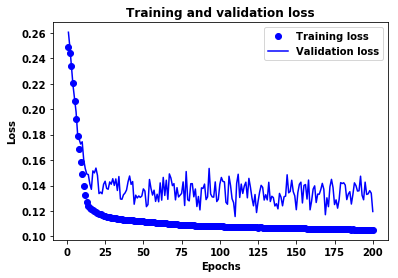

In [14]:
#loss result ***if the figure doesn't show up, please run again
import matplotlib.pyplot as plt
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

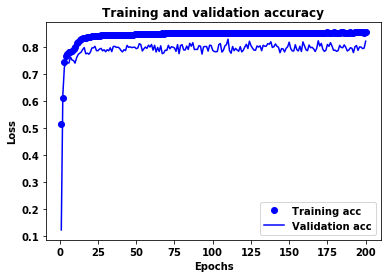

In [15]:
#accuracy result
plt.clf()
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

## Test data prediction

In [16]:
#read test.csv
x_test_ori = pd.read_csv("test.csv", engine = "python")
x_test = pd.read_csv("test.csv", engine = "python")
#use the same method to process test data
#change the obejct into numeric data
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
for i in range(0, len(cate_lst)):
    if (x_test[cate_lst[i]].count() != len(x_test)):
        x_test[cate_lst[i]] = x_test[cate_lst[i]].fillna("NA")
        #print(cate_lst[i])
        x_test[cate_lst[i]] = labelencoder.fit_transform(x_test[cate_lst[i]])
    else:
        #print(cate_lst[i])
        x_test[cate_lst[i]] = labelencoder.fit_transform(x_test[cate_lst[i]])
#standarize the numeric data
for lst in nume_lst:
    x_test[lst] = (x_test[lst] - x_test[lst].mean()) / x_test[lst].std()
#drop some columns
x_test = x_test.drop(columns = ["ID", "Education", "Country"])

In [17]:
#prediict
predictions = model.predict(x_test)

In [18]:
predictions

array([[0.98993075, 0.0100692 ],
       [0.49016112, 0.5098388 ],
       [0.19701718, 0.8029828 ],
       ...,
       [0.70699215, 0.29300785],
       [0.9539957 , 0.04600434],
       [0.02063055, 0.97936946]], dtype=float32)

In [19]:
#using argmax to change targets back to 1-0
result = []
for i in range(0,len(predictions)):
    result.append(np.argmax(predictions[i]))

In [20]:
#rename the columns
output = pd.DataFrame()
output["ID"] = x_test_ori["ID"]
output["Target"] = result

In [21]:
#output to csv
#output.to_csv("prediction_final.csv")